In [1]:
import numpy as np
import pandas as pd

import gc
import os
from tqdm import tqdm_notebook, tqdm
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar


In [3]:
gsod = pd.read_csv('/Users/jincui/Downloads/landsat_analysis/flinders_chase_clean_5day.csv')
adj  = np.load('/Users/jincui/Downloads/landsat_analysis/adjacency.npz')['dnbr']

In [24]:
adj_s = (adj[:,200:1200,100:1100,:]>0.66).mean(axis=-1).mean(axis=-1).mean(axis=-1)
adj_n = (adj[:,0:1000,100:1100,:]>0.66).mean(axis=-1).mean(axis=-1).mean(axis=-1)
adj_w = (adj[:,100:1100,0:1000,:]>0.66).mean(axis=-1).mean(axis=-1).mean(axis=-1)
adj_e = (adj[:,100:1100,200:1200,:]>0.66).mean(axis=-1).mean(axis=-1).mean(axis=-1)

adj_nw = (adj[:,0:1000,0:1000,:]>0.66).mean(axis=-1).mean(axis=-1).mean(axis=-1)
adj_sw = (adj[:,200:1200,0:1000,:]>0.66).mean(axis=-1).mean(axis=-1).mean(axis=-1)
adj_ne = (adj[:,0:1000,200:1200,:]>0.66).mean(axis=-1).mean(axis=-1).mean(axis=-1)
adj_se = (adj[:,200:1200,200:1200,:]>0.66).mean(axis=-1).mean(axis=-1).mean(axis=-1)
#dnbr_list  = [dnbr_s, dnbr_n, dnbr_w, dnbr_e, dnbr_nw, dnbr_sw, dnbr_ne, dnbr_se]
col_names= ['south','north','west','east','northwest','southwest','northeast','southeast']


In [28]:
adj_features = pd.DataFrame(np.column_stack([adj_s,adj_n,adj_w,adj_e,adj_nw,adj_sw,adj_ne,adj_se]))
adj_features.columns = col_names

In [30]:
gsod_features = pd.read_csv('/Users/jincui/Downloads/landsat_analysis/flinders_chase_clean_5day.csv')
gsod_features.head()

,temp_0,dewp_0,slp_0,visib_0,wdsp_0,mxpsd_0,max_0,min_0,prcp_0,rain_drizzle_0,...,temp_4,dewp_4,slp_4,visib_4,wdsp_4,mxpsd_4,max_4,min_4,prcp_4,rain_drizzle_4
0,69.1,50.9,1011.5,10.9,9.3,13.0,75.6,50.7,0.00,0,...,62.7,50.5,1021.8,13.7,12.0,19.0,73.9,51.4,0.00,0
1,65.5,55.4,1020.8,11.5,13.4,15.9,77.0,53.8,0.00,0,...,73.2,59.7,1010.6,11.2,17.8,22.9,90.5,63.1,0.00,0
2,81.2,53.5,1009.2,17.1,9.8,13.0,96.4,68.4,0.00,0,...,66.3,54.5,1009.8,11.5,13.2,19.0,73.4,54.3,0.02,0
3,62.4,46.6,1016.8,11.5,9.1,15.0,71.4,56.3,0.00,0,...,63.4,59.7,1014.1,11.5,8.5,13.0,69.8,58.1,0.04,0
4,66.5,56.5,1013.5,10.9,14.2,17.1,75.6,59.7,0.01,0,...,66.7,63.3,1005.1,11.8,11.4,17.1,77.5,61.9,0.00,0


In [39]:
dnbr = np.load('/Users/jincui/Downloads/cloud_control_data.npz')['dnbr']
water_mask = np.load('/Users/jincui/Downloads/Insight_project/water_mask_based_on_ndvi_565.npy')
labs = (dnbr>0.66).astype(int)
gc.collect()
### apply water mask
for i in range(len(labs)):
    labs[i,:][water_mask==1] = 0


In [57]:
burn_pixels = labs.sum(axis=-1).sum(axis=-1).sum(axis=-1)
burn_pixels = burn_pixels[1:]

In [58]:
combined_features = pd.concat([adj_features.iloc[:107,:].reset_index(drop=True), gsod_features[1:].reset_index(drop=True)],1)
combined_features['burn_pixels'] = burn_pixels
combined_features.head()


,south,north,west,east,northwest,southwest,northeast,southeast,temp_0,dewp_0,...,dewp_4,slp_4,visib_4,wdsp_4,mxpsd_4,max_4,min_4,prcp_4,rain_drizzle_4,burn_pixels
0,0.000036,0.001263,0.000675,0.000000,0.002732,0.000465,0.001263,0.000000,65.5,55.4,...,59.7,1010.6,11.2,17.8,22.9,90.5,63.1,0.00,0,47582
1,0.045440,0.051765,0.044472,0.052496,0.049706,0.041216,0.055577,0.050003,81.2,53.5,...,54.5,1009.8,11.5,13.2,19.0,73.4,54.3,0.02,0,7654
2,0.005650,0.016784,0.006268,0.010804,0.015261,0.005445,0.023255,0.007855,62.4,46.6,...,59.7,1014.1,11.5,8.5,13.0,69.8,58.1,0.04,0,1260
3,0.002998,0.000845,0.000637,0.001218,0.000665,0.001842,0.000805,0.002200,66.5,56.5,...,63.3,1005.1,11.8,11.4,17.1,77.5,61.9,0.00,0,8
4,0.000343,0.002134,0.000198,0.000008,0.002273,0.000511,0.002134,0.000097,63.0,55.6,...,49.1,1023.8,13.4,10.7,15.9,71.2,54.0,0.00,0,1342


In [77]:
corr = combined_features.corr()['burn_pixels']
corr = corr[corr.values!=1]
corr = corr.sort_values()

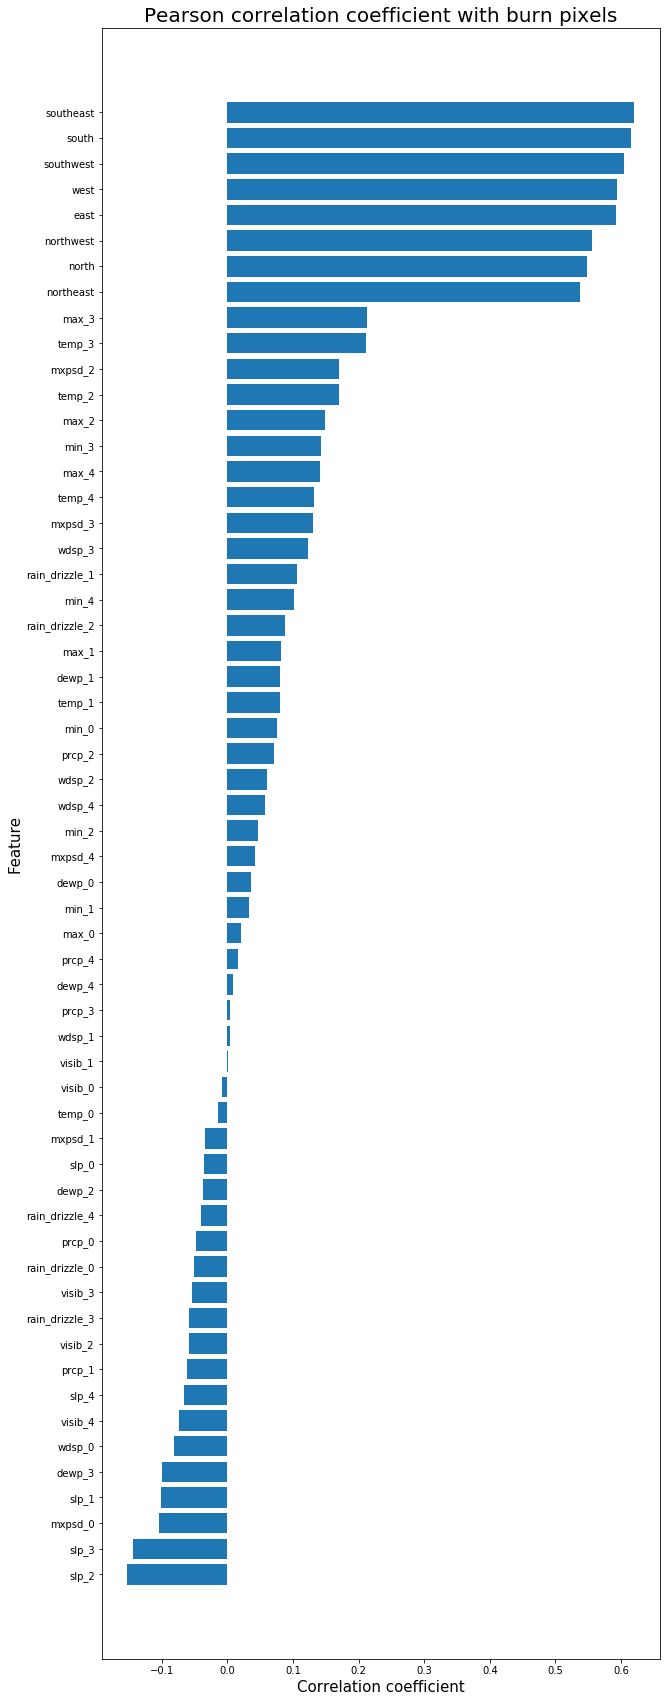

In [120]:
plt.figure(figsize=(10,30))
fontsize = 15
plt.barh(corr.index, corr.values)
plt.xlabel("Correlation coefficient", fontsize=fontsize)
plt.ylabel("Feature", fontsize=fontsize)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Pearson correlation coefficient with burn pixels', fontsize=20)

plt.show()

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_trn, X_val, y_trn, y_val = train_test_split(combined_features.drop(['burn_pixels'],1), 
                                              combined_features['burn_pixels'], test_size=0.25, random_state=42)


rf = RandomForestRegressor(random_state=42)
rf.fit(X_trn, y_trn)
y_pred = rf.predict(X_val)

In [115]:
importance_values = rf.feature_importances_
col_names = np.array(list(combined_features.drop(['burn_pixels'],1).columns))
sort_idx = np.argsort(importance_values)


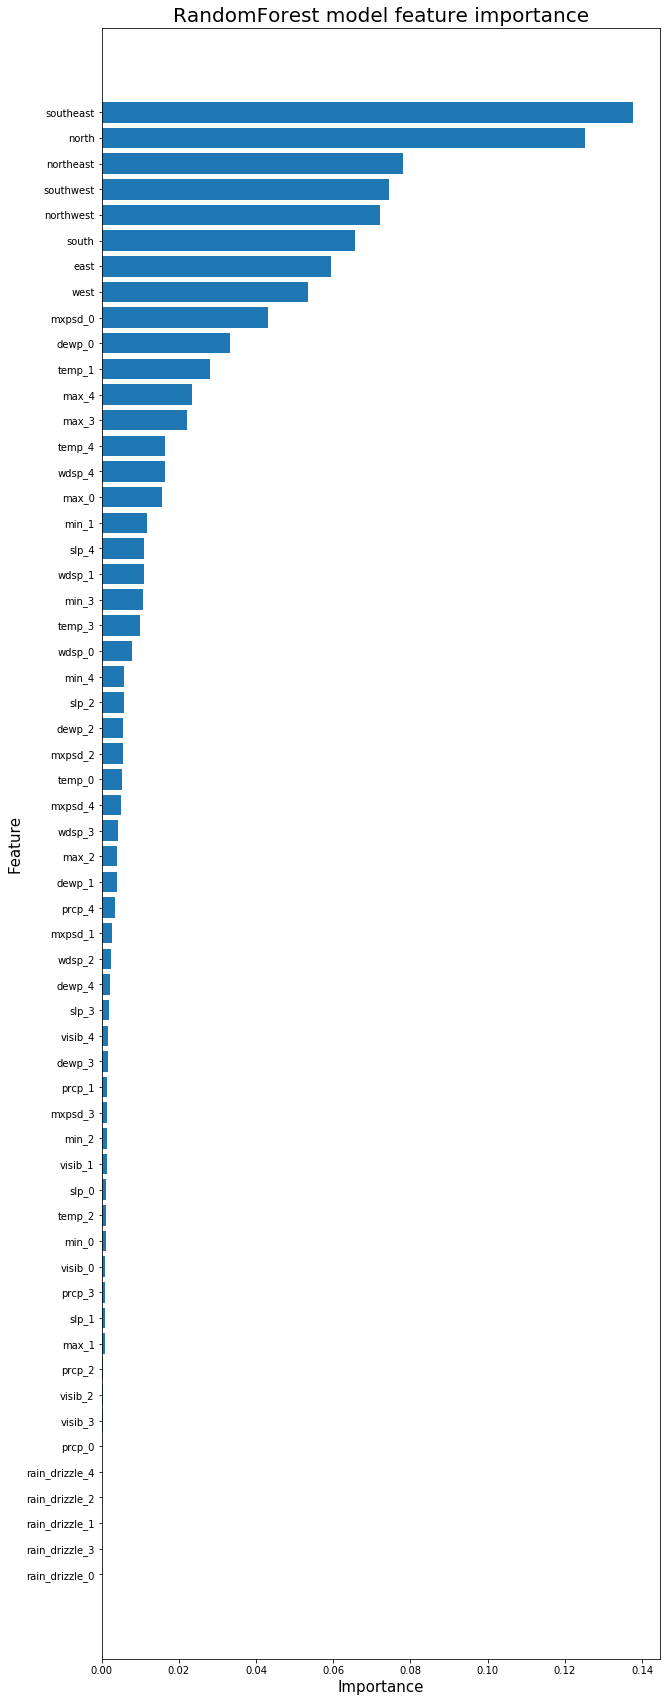

In [119]:
plt.figure(figsize=(10,30))
fontsize = 15
plt.barh(col_names[sort_idx], importance_values[sort_idx])
plt.xlabel("Importance", fontsize=fontsize)
plt.ylabel("Feature", fontsize=fontsize)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('RandomForest model feature importance', fontsize=20)
plt.show()